In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px


Load the data

In [33]:
full_df = pd.read_csv('../data/kickstarter_data_full.csv', index_col=0, low_memory=False)
df = pd.read_csv('../data/kickstarter_data_with_features.csv', index_col=0, low_memory=False)

### Data Overview

In [6]:
full_df.columns

Index(['id', 'photo', 'name', 'blurb', 'goal', 'pledged', 'state', 'slug',
       'disable_communication', 'country', 'currency', 'currency_symbol',
       'currency_trailing_code', 'deadline', 'state_changed_at', 'created_at',
       'launched_at', 'staff_pick', 'backers_count', 'static_usd_rate',
       'usd_pledged', 'creator', 'location', 'category', 'profile',
       'spotlight', 'urls', 'source_url', 'friends', 'is_starred',
       'is_backing', 'permissions', 'name_len', 'name_len_clean', 'blurb_len',
       'blurb_len_clean', 'deadline_weekday', 'state_changed_at_weekday',
       'created_at_weekday', 'launched_at_weekday', 'deadline_month',
       'deadline_day', 'deadline_yr', 'deadline_hr', 'state_changed_at_month',
       'state_changed_at_day', 'state_changed_at_yr', 'state_changed_at_hr',
       'created_at_month', 'created_at_day', 'created_at_yr', 'created_at_hr',
       'launched_at_month', 'launched_at_day', 'launched_at_yr',
       'launched_at_hr', 'create_to_launch

In [8]:
full_df.head(2)

,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,country,...,launch_to_deadline,launch_to_state_change,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend
0,1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,US,...,36 days 20:47:24.000000000,36 days 20:47:24.000000000,17,36,36,0,1,1,0,0
1,1655206086,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Jump Start Kindergarten Toolkit,"This kit teaches how to print, correct an ugly...",500.0,0.0,failed,jump-start-kindergarten-toolkit,False,US,...,60 days 00:00:00.000000000,60 days 00:00:02.000000000,10,60,60,0,1,1,0,0


In [20]:
full_df.info()
full_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 20632 entries, 0 to 20631
Data columns (total 67 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           20632 non-null  int64  
 1   photo                        20632 non-null  object 
 2   name                         20632 non-null  object 
 3   blurb                        20626 non-null  object 
 4   goal                         20632 non-null  float64
 5   pledged                      20632 non-null  float64
 6   state                        20632 non-null  object 
 7   slug                         20632 non-null  object 
 8   disable_communication        20632 non-null  bool   
 9   country                      20632 non-null  object 
 10  currency                     20632 non-null  object 
 11  currency_symbol              20632 non-null  object 
 12  currency_trailing_code       20632 non-null  bool   
 13  deadline             

,id,goal,pledged,backers_count,static_usd_rate,usd_pledged,name_len,name_len_clean,blurb_len,blurb_len_clean,...,launched_at_yr,launched_at_hr,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend
count,2.063200e+04,2.063200e+04,2.063200e+04,20632.000000,20632.000000,2.063200e+04,20627.000000,20627.000000,20627.000000,20627.000000,...,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000
mean,1.071156e+09,9.410497e+04,2.139268e+04,183.675843,1.039363,2.091591e+04,5.940806,5.292578,18.991177,13.081204,...,2014.752084,12.417168,49.577598,34.716896,31.169397,0.291683,0.806466,0.816208,0.225136,0.292022
std,6.154929e+08,1.335511e+06,1.204973e+05,1222.012658,0.230419,1.154717e+05,2.826118,2.418168,4.632371,3.283547,...,1.261752,5.574409,111.094601,11.873143,14.279705,0.454548,0.395078,0.387324,0.417682,0.454703
min,1.645550e+05,1.000000e+00,0.000000e+00,0.000000,0.045641,0.000000e+00,1.000000,1.000000,1.000000,1.000000,...,2009.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.472185e+08,4.000000e+03,2.500000e+01,2.000000,1.000000,2.500000e+01,4.000000,3.000000,17.000000,11.000000,...,2014.000000,9.000000,3.000000,30.000000,28.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,1.069882e+09,1.400000e+04,6.950000e+02,12.000000,1.000000,7.163012e+02,6.000000,5.000000,20.000000,13.000000,...,2015.000000,12.000000,14.000000,30.000000,30.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,1.601801e+09,5.000000e+04,5.954250e+03,63.000000,1.000000,6.004628e+03,8.000000,7.000000,22.000000,15.000000,...,2016.000000,16.000000,45.000000,40.000000,35.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,2.147388e+09,1.000000e+08,6.225355e+06,105857.000000,1.715913,6.225355e+06,16.000000,14.000000,35.000000,30.000000,...,2017.000000,23.000000,1754.000000,91.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
null_counts = full_df.isnull().sum()
null_counts = null_counts[null_counts > 0].sort_values(ascending=False)
print(null_counts)


is_backing         20572
is_starred         20572
friends            20572
permissions        20572
category            1889
location              45
blurb                  6
name_len               5
name_len_clean         5
blurb_len              5
blurb_len_clean        5
dtype: int64


In [21]:
print(f"Rows: {full_df.shape[0]}, Columns: {full_df.shape[1]}")
full_df.nunique().sort_values()

Rows: 20632, Columns: 67


permissions                   1
is_backing                    1
is_starred                    1
friends                       1
currency_trailing_code        2
                          ...  
slug                      20632
profile                   20632
id                        20632
photo                     20632
urls                      20632
Length: 67, dtype: int64

### Comparison of Full Dataset vs Data with Features ###

We are not told the difference between the two datasets. I can see that one of them has 8 more columns than the other. Let's try to understand what the differences are between them.

Start by getting the columns that are not in common between the two datasets.

In [7]:
cols_not_in_common = set(full_df.columns).symmetric_difference(df.columns)
print(cols_not_in_common)

{'DeadlineWeekend', 'launch_to_state_change_days', 'USorGB', 'SuccessfulBool', 'create_to_launch_days', 'TOPCOUNTRY', 'LaunchedTuesday', 'launch_to_deadline_days'}


In [34]:
full_df.columns

Index(['id', 'photo', 'name', 'blurb', 'goal', 'pledged', 'state', 'slug',
       'disable_communication', 'country', 'currency', 'currency_symbol',
       'currency_trailing_code', 'deadline', 'state_changed_at', 'created_at',
       'launched_at', 'staff_pick', 'backers_count', 'static_usd_rate',
       'usd_pledged', 'creator', 'location', 'category', 'profile',
       'spotlight', 'urls', 'source_url', 'friends', 'is_starred',
       'is_backing', 'permissions', 'name_len', 'name_len_clean', 'blurb_len',
       'blurb_len_clean', 'deadline_weekday', 'state_changed_at_weekday',
       'created_at_weekday', 'launched_at_weekday', 'deadline_month',
       'deadline_day', 'deadline_yr', 'deadline_hr', 'state_changed_at_month',
       'state_changed_at_day', 'state_changed_at_yr', 'state_changed_at_hr',
       'created_at_month', 'created_at_day', 'created_at_yr', 'created_at_hr',
       'launched_at_month', 'launched_at_day', 'launched_at_yr',
       'launched_at_hr', 'create_to_launch

### Feature Description and Analysis ###

"SuccessfulBool" should be the target feature since it indicates the outcome of the kickstarter.

<table>
  <tr>
    <th>Column</th>
    <th>Description</th>
    <th>Dead (not useful at all)</th>
  </tr>
  <tr>
    <td>id</td>
    <td>Unique ID for each project.</td>
    <td>yes</td>
  </tr>
  <tr>
    <td>photo</td>
    <td>contains json object of urls to photos. All of the urls are dead.</td>
    <td>yes</td>
  </tr>
  <tr>
    <td>name</td>
    <td>string name of the kickstarter</td>
    <td></td>
  </tr>
  <tr>
    <td>blurb</td>
    <td>describes the kickstarter</td>
    <td></td>
  </tr>
  <tr>
    <td>goal</td>
    <td>the minimum fundraise amount to be reached by the deadline</td>
    <td></td>
  </tr>
  <tr>
    <td>pledged</td>
    <td>the total that has been raised so far</td>
    <td></td>
  </tr>
  <tr>
    <td>state</td>
    <td>the outcome of the kickstarter: canceled, failed, live, successful, suspended</td>
    <td>yes</td>
  </tr>
  <tr>
    <td>slug</td>
    <td>url-friendly conversion of the kickstarter title</td>
    <td>yes</td>
  </tr>
  <tr>
    <td>disable communication</td>
    <td>This probably means the creator disabled commenting from non-backers. </td>
    <td></td>
  </tr>
  <tr>
    <td>country</td>
    <td>Country code of the kickstarter. </td>
    <td></td>
  </tr>
  <tr>
    <td>currency</td>
    <td>currrency string of accepted donation currency. Kickstarter has payment processors that convert the currency to the target one. </td>
    <td></td>
  </tr>
  <tr>
    <td>currency symbol</td>
    <td>Symbol for the currency (e.g., $, £).	</td>
    <td>yes</td>
  </tr>
  <tr>
    <td>currency trialing code</td>
    <td>whether the currency string goes before or after the amount for formatting purposes. </td>
    <td>yes</td>
  </tr>
  <tr>
    <td>deadline</td>
    <td>The kickstarter deadline in YYYY-MM-DD HH:MM:SS format. </td>
    <td></td>
  </tr>
  <tr>
    <td>state changed at</td>
    <td>The datetime of the most recent state change (e.g. live, successsful, failed, canceled, delivered) in YYYY-MM-DD HH:MM:SS format. </td>
    <td></td>
  </tr>
  <tr>
    <td>created_at</td>
    <td>Timestamp of when the campaign was created.</td>
    <td></td>
  </tr>
  <tr>
    <td>launched at</td>
    <td>The launch time in YYYY-MM-DD HH:MM:SS format. </td>
    <td></td>
  </tr>
  <tr>
    <td>staff pick</td>
    <td>True or false. Whether kickstarter promoted the project. </td>
    <td></td>
  </tr>
  <tr>
    <td>backers_count</td>
    <td>The number of backers of a kickstarter. </td>
    <td></td>
  </tr>
  <tr>
    <td>static usd rate</td>
    <td>Exchange rate at the time the kickstarter ended </td>
    <td></td>
  </tr>
  <tr>
    <td>usd_pledged</td>
    <td>The amount raised in USD. </td>
    <td></td>
  </tr>
  <tr>
    <td>creator</td>
    <td>url structure for the creator. some of the links work but others are not accessible. </td>
    <td>yes</td>
  </tr>
  <tr>
    <td>location</td>
    <td>Location metadata </td>
    <td>yes</td>
  </tr>
  <tr>
    <td>category</td>
    <td>Category of the campaign (Art, Technology). </td>
    <td></td>
  </tr>
  <tr>
    <td>profile</td>
    <td>JSON with video</td>
    <td>yes</td>
  </tr>
  <tr>
    <td>spotlight</td>
    <td>Whether the campaign is in the "spotlight" section</td>
    <td></td>
  </tr>
  <tr>
    <td>urls</td>
    <td>JSON object with various site URLs; largely redundant</td>
    <td>yes</td>
  </tr>
  <tr>
    <td>source_url</td>
    <td>Feed URL to which the kickstarter was discovered.  </td>
    <td>yes</td>
  </tr>
  <tr>
    <td>friends</td>
    <td>n/a</td>
    <td>yes</td>
  </tr>
  <tr>
    <td>is_starred</td>
    <td>n/a </td>
    <td>yes</td>
  </tr>
<tr>
    <td>is_backing</td>
    <td>n/a </td>
    <td>yes</td>
  </tr>
  <tr>
    <td>permissions</td>
    <td>n/a</td>
    <td>yes</td>
  </tr>
    <tr>
    <td>name_len</td>
    <td>the number of words in the name feature </td>
    <td></td>
  </tr>
  <tr>
    <td>name_len_clean</td>
    <td>the number of words in the name feature after processing </td>
    <td></td>
  </tr>
  <tr>
    <td>blurb_len</td>
    <td>the number of words in the blurb </td>
    <td></td>
  </tr>
  <tr>
    <td>blurb_len_clean</td>
    <td>the number of words in the blurb feature after processing  </td>
    <td></td>
  </tr>
  <tr>
    <td>deadline_weekday</td>
    <td>The week day in which the kickstarter ends. All rows are populated. Mon-Sun </td>
    <td></td>
  </tr>
  <tr>
    <td>state_changed_at_weekday</td>
    <td>the weekday which the state last changed.</td>
    <td></td>
  </tr>
  <tr>
    <td>created_at_weekday</td>
    <td>the weekday which the kickstarter was created. Not yet public.</td>
    <td></td>
  </tr>
  <tr>
    <td>launched_at_weekday</td>
    <td>The weekday which the kickstarter launched to the public. </td>
    <td></td>
  </tr>
  <tr>
    <td>deadline_month</td>
    <td>The month (1-12) in which the deadline falls. </td>
    <td></td>
  </tr>
  <tr>
    <td>deadline_day</td>
    <td>The day (1-31) in which the deadline falls. </td>
    <td></td>
  </tr>
  <tr>
    <td>deadline_yr</td>
    <td>The year (yyyy) in which the deadline falls. </td>
    <td></td>
  </tr>
  <tr>
    <td>deadline_hr</td>
    <td>The deadline hour (0-23). </td>
    <td></td>
  </tr>
  <tr>
    <td>state_changed_at_month</td>
    <td>Month of the most recent state change </td>
    <td></td>
  </tr>
  <tr>
    <td>state_changed_at_day</td>
    <td>Day of the state change</td>
    <td></td>
  </tr>
  <tr>
    <td>state_changed_at_yr</td>
    <td>Year of the state change</td>
    <td></td>
  </tr>
  <tr>
    <td>state_changed_at_hr</td>
    <td>Hour of the state change</td>
    <td></td>
  </tr>
  <tr>
    <td>created_at_month</td>
    <td>Month the campaign was created</td>
    <td></td>
  </tr>
  <tr>
    <td>created_at_day</td>
    <td>Day the campaign was created</td>
    <td></td>
  </tr>
  <tr>
    <td>created_at_yr</td>
    <td>Year the campaign was created</td>
    <td></td>
  </tr>
  <tr>
    <td>created_at_hr</td>
    <td>Hour the campaign was created</td>
    <td></td>
  </tr>
  <tr>
    <td>launched_at_month</td>
    <td>Month of launch</td>
    <td></td>
  </tr>
  <tr>
    <td>launched_at_day</td>
    <td>Day of launch</td>
    <td></td>
  </tr>
  <tr>
    <td>launched_at_yr</td>
    <td>Year of launch</td>
    <td></td>
  </tr>
  <tr>
    <td>launched_at_hr</td>
    <td>Hour of launch</td>
    <td></td>
  </tr>
  <tr>
    <td>create_to_launch</td>
    <td>Time difference between creation and launch (in seconds or minutes)</td>
    <td></td>
  </tr>
  <tr>
    <td>launch_to_deadline</td>
    <td>Time difference between launch and deadline</td>
    <td></td>
  </tr>
  <tr>
    <td>launch_to_state_change</td>
    <td>Time between launch and state change</td>
    <td></td>
  </tr>
  <tr>
    <td>create_to_launch_days</td>
    <td>Days between creation and launch</td>
    <td></td>
  </tr>
  <tr>
    <td>launch_to_deadline_days</td>
    <td>Days from launch to deadline</td>
    <td></td>
  </tr>
  <tr>
    <td>launch_to_state_change_days</td>
    <td>Days from launch to final state change</td>
    <td></td>
  </tr>
  <tr>
    <td>SuccessfulBool</td>
    <td>Binary (1 if successful, 0 otherwise)</td>
    <td></td>
  </tr>
  <tr>
    <td>USorGB</td>
    <td>Whether the campaign is based in the US or GB</td>
    <td></td>
  </tr>
  <tr>
    <td>TOPCOUNTRY</td>
    <td>Whether the campaign belongs to one of the top countries (frequent in dataset)</td>
    <td></td>
  </tr>
  <tr>
    <td>LaunchedTuesday</td>
    <td>Whether the campaign launched on a Tuesday</td>
    <td></td>
  </tr>
  <tr>
    <td>DeadlineWeekend</td>
    <td>Whether the campaign ends on a weekend</td>
    <td></td>
  </tr>
</table>

Remove irrevalent features

In [120]:
columns_to_remove = [
    'id', 'photo', 'slug', 'currency_symbol', 'currency_trailing_code',
    'creator', 'location', 'profile', 'urls', 'source_url', 'friends',
    'is_starred', 'is_backing', 'permissions', 'state'
]

df = full_df.drop(columns=[col for col in columns_to_remove if col in full_df.columns])

df.to_csv('kickstarter_cleaned.csv', index=False)

In [121]:
df = pd.read_csv("kickstarter_cleaned.csv", parse_dates=['deadline', 'created_at', 'launched_at', 'state_changed_at'])


Explore Null values

In [122]:
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0].sort_values(ascending=False)
print(null_counts)

category           1889
blurb                 6
name_len              5
name_len_clean        5
blurb_len             5
blurb_len_clean       5
dtype: int64


In [123]:
mask_name_len = df['name_len'].isnull()
df.loc[mask_name_len, 'name_len'] = df.loc[mask_name_len, 'name'].apply(len)

mask_name_len_clean = df['name_len_clean'].isnull()
df.loc[mask_name_len_clean, 'name_len_clean'] = df.loc[mask_name_len_clean, 'name'].str.strip().str.lower().apply(len)

df['blurb'] = df['blurb'].fillna('')

mask_blurb_len = df['blurb_len'].isnull()
df.loc[mask_blurb_len, 'blurb_len'] = df.loc[mask_blurb_len, 'blurb'].apply(len).astype(int)

mask_blurb_len_clean = df['blurb_len_clean'].isnull()
df.loc[mask_blurb_len_clean, 'blurb_len_clean'] = df.loc[mask_blurb_len_clean, 'blurb'].str.strip().str.lower().apply(len).astype(int)

C:\Users\anand\AppData\Local\Temp\ipykernel_28996\704412316.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


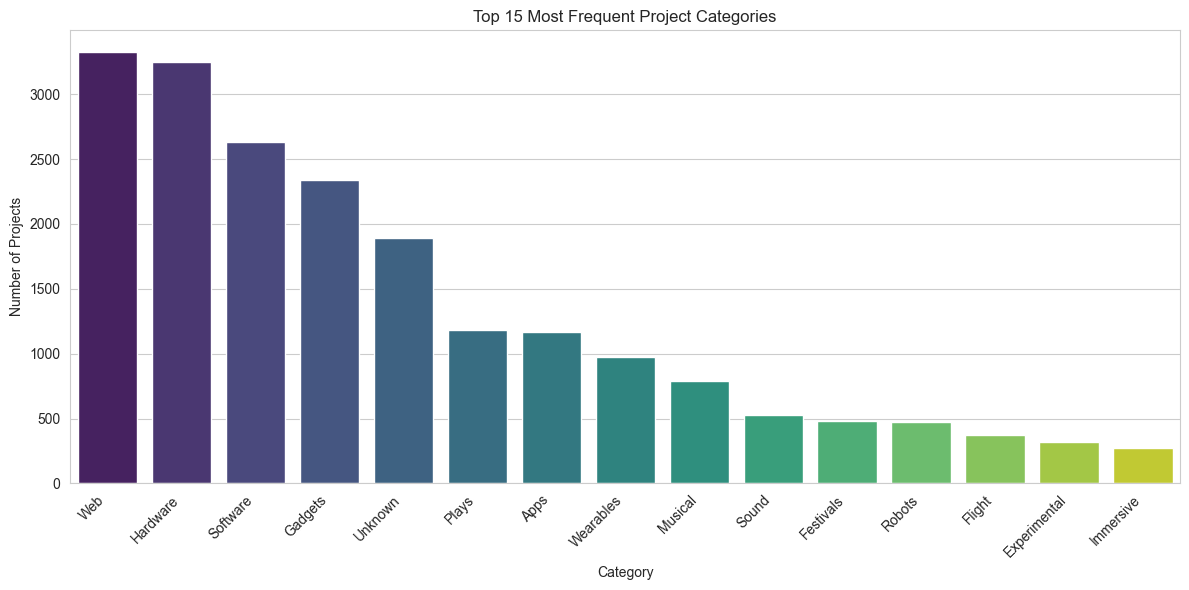

In [124]:
df['category'] = df['category'].fillna('Unknown')
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

top_categories = df['category'].value_counts().nlargest(15)

sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title("Top 15 Most Frequent Project Categories")
plt.xlabel("Category")
plt.ylabel("Number of Projects")
plt.tight_layout()
plt.show()

Target Variable


Target Variable Distribution:
SuccessfulBool
0    0.708317
1    0.291683
Name: proportion, dtype: float64


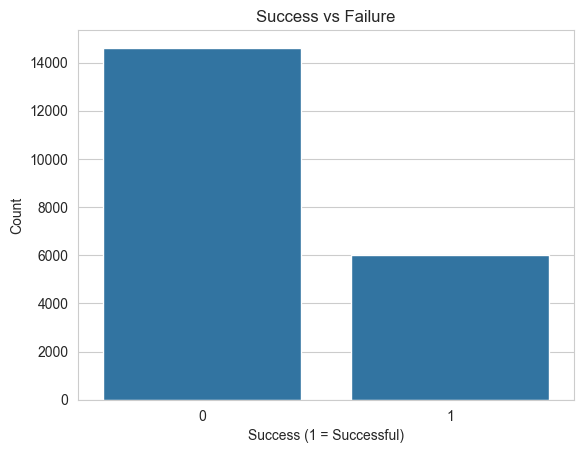

In [125]:
print("\nTarget Variable Distribution:")
print(df['SuccessfulBool'].value_counts(normalize=True))

sns.countplot(x='SuccessfulBool', data=df)
plt.title("Success vs Failure")
plt.xlabel("Success (1 = Successful)")
plt.ylabel("Count")
plt.show()

We need to account for this **class imbalance** when training and evaluating models

Numerical Features Correlation Matrix

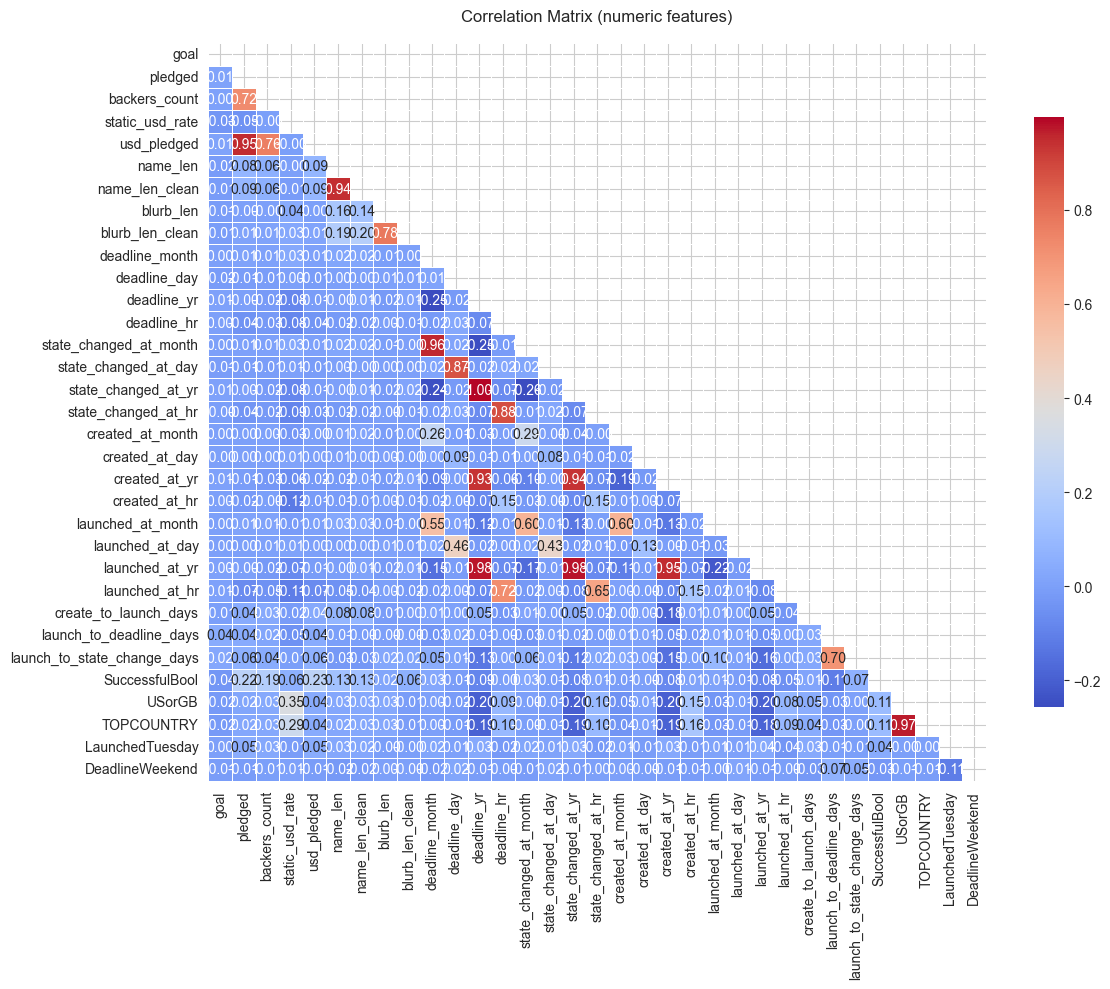

In [126]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

corr = df[num_cols].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12,10))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"shrink": .8},
    linewidths=0.5
)
plt.title("Correlation Matrix (numeric features)", pad=16)
plt.tight_layout()
plt.show()


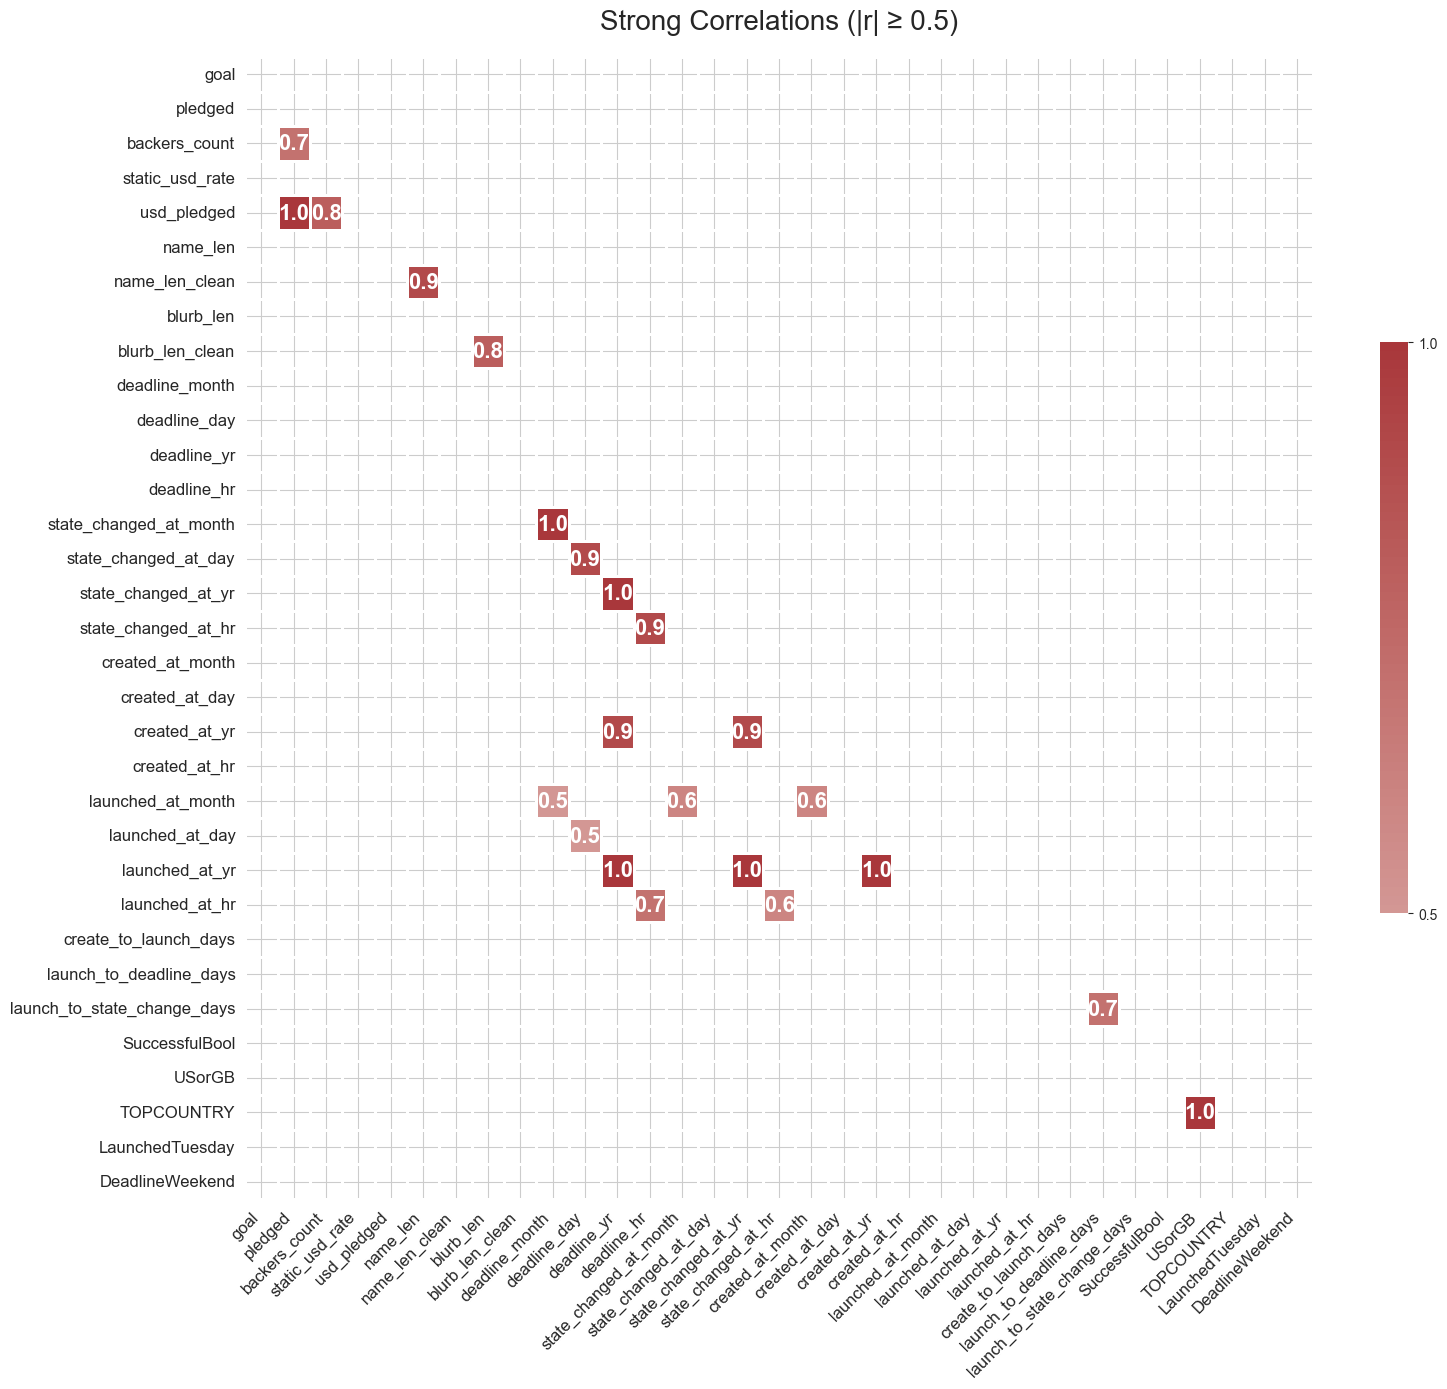

In [127]:
corr = df[num_cols].corr().round(1)

mask = np.triu(np.ones_like(corr, dtype=bool))

strong = corr.where(corr.abs() >= 0.5)

plt.figure(figsize=(16,14))
sns.heatmap(
    strong,
    mask=mask,
    annot=True,             
    fmt=".1f",              
    annot_kws={"size":16,   
               "weight":"bold"},
    cmap="vlag",             
    center=0,
    linewidths=1,
    cbar_kws={"shrink":0.5,   
              "ticks":np.arange(-1, 1.1, 0.5)}
)

plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.title("Strong Correlations (|r| ≥ 0.5)", fontsize=20, pad=20)
plt.tight_layout()
plt.show()

In [128]:
mask_lower = np.tril(np.ones_like(corr, dtype=bool), k=-1)

strong_pairs = (
    corr.where(mask_lower)             
        .stack()                       
        .loc[lambda s: s.abs() >= 0.5] 
        .sort_values(ascending=False) 
)

print(strong_pairs.to_frame(name='r'))

                                                       r
usd_pledged                 pledged                  1.0
state_changed_at_month      deadline_month           1.0
launched_at_yr              deadline_yr              1.0
                            state_changed_at_yr      1.0
                            created_at_yr            1.0
state_changed_at_yr         deadline_yr              1.0
TOPCOUNTRY                  USorGB                   1.0
state_changed_at_day        deadline_day             0.9
state_changed_at_hr         deadline_hr              0.9
name_len_clean              name_len                 0.9
created_at_yr               state_changed_at_yr      0.9
                            deadline_yr              0.9
usd_pledged                 backers_count            0.8
blurb_len_clean             blurb_len                0.8
backers_count               pledged                  0.7
launch_to_state_change_days launch_to_deadline_days  0.7
launched_at_hr              dea

Key Observations from the Correlation Matrix

usd_pledged ↔ pledged: r ≈ 1.0

usd_pledged ↔ static_usd_rate: r ≈ 0.8

usd_pledged = pledged × static_usd_rate

___________________________________________________________________________

backers_count ↔ pledged (and therefore ↔ usd_pledged): r ≈ 0.7

More backers → more cash
___________________________________________________________________________

name_len ↔ name_len_clean: r ≈ 0.9

blurb_len ↔ blurb_len_clean: r ≈ 0.8

Cleaning/stripping whitespace doesn’t change lengths much—these pairs are almost interchangeable.
___________________________________________________________________________

All “\_year”, “\_month”, “\_day” (and even “\_hour”) features for the same date field correlate at \(r ≈  1.0\).

___________________________________________________________________________



In [129]:
corr_target = corr['SuccessfulBool'].drop('SuccessfulBool').sort_values()
corr_target


state_changed_at_yr           -0.1
deadline_yr                   -0.1
launched_at_yr                -0.1
created_at_yr                 -0.1
launched_at_hr                -0.1
launch_to_deadline_days       -0.1
goal                          -0.0
blurb_len                      0.0
state_changed_at_day          -0.0
created_at_month              -0.0
created_at_hr                  0.0
created_at_day                -0.0
deadline_month                 0.0
deadline_day                  -0.0
deadline_hr                   -0.0
state_changed_at_month         0.0
launched_at_day               -0.0
launched_at_month              0.0
create_to_launch_days          0.0
DeadlineWeekend               -0.0
LaunchedTuesday                0.0
state_changed_at_hr            0.0
name_len                       0.1
static_usd_rate                0.1
name_len_clean                 0.1
launch_to_state_change_days    0.1
TOPCOUNTRY                     0.1
blurb_len_clean                0.1
USorGB              

Almost every feature sits near zero (│r│<0.2), meaning none of our raw numeric columns have a strong straight‐line correlation with success.

Drop duplicate columns

In [130]:
dup_groups = {
    # financial
    ('usd_pledged', 'pledged'): 'usd_pledged',
    # text length
    ('name_len_clean', 'name_len'): 'name_len_clean',
    ('blurb_len_clean', 'blurb_len'): 'blurb_len_clean',
    # geography flag
    ('TOPCOUNTRY', 'USorGB'): 'TOPCOUNTRY',
    # durations
    # ('launch_to_state_change_days', 'launch_to_deadline_days'):
    #     'launch_to_state_change_days',
    # date‐parts: months
    # ('state_changed_at_month', 'deadline_month', 'created_at_month',
    #  'launched_at_month'): 'launched_at_month',
    ('state_changed_at_month', 'deadline_month'): 'deadline_month',
    # date‐parts: days
    # ('state_changed_at_day', 'deadline_day', 'launched_at_day'):
    #     'launched_at_day',
    ('state_changed_at_day', 'deadline_day'):
        'deadline_day',
    # date‐parts: hours
    # ('state_changed_at_hr', 'deadline_hr', 'launched_at_hr'):
    #     'launched_at_hr',
    ('state_changed_at_hr', 'deadline_hr'):
        'deadline_hr',
    # date‐parts: years
    ('state_changed_at_yr', 'deadline_yr', 'created_at_yr',
     'launched_at_yr'): 'launched_at_yr',
}

to_drop = []
for group, keeper in dup_groups.items():
    for col in group:
        if col != keeper and col in df.columns:
            to_drop.append(col)

df_reduced = df.drop(columns=to_drop)

print(f"Dropped {len(to_drop)} cols:")
print(to_drop)
print(f"\nRemaining columns ({df_reduced.shape[1]}):")
print(df_reduced.columns.tolist())


Dropped 10 cols:
['pledged', 'name_len', 'blurb_len', 'USorGB', 'state_changed_at_month', 'state_changed_at_day', 'state_changed_at_hr', 'state_changed_at_yr', 'deadline_yr', 'created_at_yr']

Remaining columns (42):
['name', 'blurb', 'goal', 'disable_communication', 'country', 'currency', 'deadline', 'state_changed_at', 'created_at', 'launched_at', 'staff_pick', 'backers_count', 'static_usd_rate', 'usd_pledged', 'category', 'spotlight', 'name_len_clean', 'blurb_len_clean', 'deadline_weekday', 'state_changed_at_weekday', 'created_at_weekday', 'launched_at_weekday', 'deadline_month', 'deadline_day', 'deadline_hr', 'created_at_month', 'created_at_day', 'created_at_hr', 'launched_at_month', 'launched_at_day', 'launched_at_yr', 'launched_at_hr', 'create_to_launch', 'launch_to_deadline', 'launch_to_state_change', 'create_to_launch_days', 'launch_to_deadline_days', 'launch_to_state_change_days', 'SuccessfulBool', 'TOPCOUNTRY', 'LaunchedTuesday', 'DeadlineWeekend']


In [131]:
num_cols = df_reduced.select_dtypes(include=['int64','float64']).columns.tolist()
corr = df_reduced[num_cols].corr().round(1)

mask = np.triu(np.ones_like(corr, dtype=bool))

strong = corr.where(corr.abs() >= 0.5)

mask_lower = np.tril(np.ones_like(corr, dtype=bool), k=-1)

strong_pairs = (
    corr.where(mask_lower)             
        .stack()                       
        .loc[lambda s: s.abs() >= 0.5] 
        .sort_values(ascending=False) 
)

print(strong_pairs.to_frame(name='r'))

                                                       r
usd_pledged                 backers_count            0.8
launch_to_state_change_days launch_to_deadline_days  0.7
launched_at_hr              deadline_hr              0.7
launched_at_month           created_at_month         0.6
                            deadline_month           0.5
launched_at_day             deadline_day             0.5


More Charts

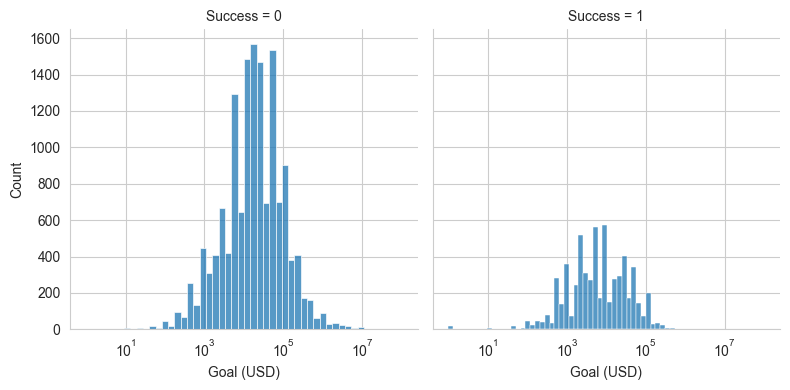

In [132]:
g = sns.FacetGrid(df, col="SuccessfulBool", height=4, sharex=True, sharey=True)
g.map(sns.histplot, "goal", log_scale=True, bins=50)
g.set_axis_labels("Goal (USD)", "Count")
g.set_titles("Success = {col_name}")
plt.tight_layout()
plt.show()



 Failed campaigns (Success = 0)

Goals span a very wide range, from under \$100 to well over \$100000.  The highest concentration of failures lies around \$5000–\$20000, but there are still many at both the very low (<\$1000) and very high (> \$50000) ends.

Successful campaigns (Success = 1)

Goals are much more tightly focused between roughly \$2000 and \$30000.  Very few successful projects set goals below \$1000 or above \$50000.

Successful campaigns tend to choose more moderate funding targets—too small a goal may undermine perceived seriousness, while setting the bar too high can appear unrealistic. This mid‐range “sweet spot” appears associated with higher success rates.  


C:\Users\anand\AppData\Local\Temp\ipykernel_28996\3533392266.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rate_by_cat.values, y=rate_by_cat.index, palette='viridis')


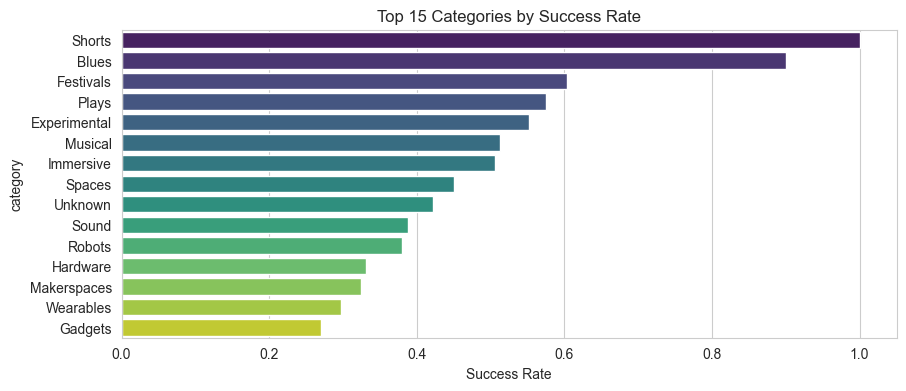

In [133]:
# Success rate by category
rate_by_cat = df_reduced.groupby('category')['SuccessfulBool'].mean().sort_values(ascending=False).head(15)
plt.figure(figsize=(10,4))
sns.barplot(x=rate_by_cat.values, y=rate_by_cat.index, palette='viridis')
plt.xlabel("Success Rate")
plt.title("Top 15 Categories by Success Rate")
plt.show()

| Category      | Success Rate |
|---------------|-------------:|
| **Shorts**        |       100% |
| **Blues**         |        90% |
| **Festivals**     |        60% |
| **Plays**         |        58% |
| **Experimental**  |        55% |
| **Musical**       |        53% |
| **Immersive**     |        52% |
| **Spaces**        |        48% |
| **Unknown**       |        45% |
| **Sound**         |        42% |
| **Robots**        |        39% |
| **Hardware**      |        36% |
| **Makerspaces**   |        34% |
| **Wearables**     |        32% |
| **Gadgets**       |        28% |

Categories like Shorts, Blues, Festivals, and Plays have high success rates. Gadgets, Wearables, Makerspaces, Hardware, and Robots all fall below ~40% success. Hardware‐oriented campaigns are riskier on average.

C:\Users\anand\AppData\Local\Temp\ipykernel_28996\2603766540.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top.values, y=top.index, palette='magma')


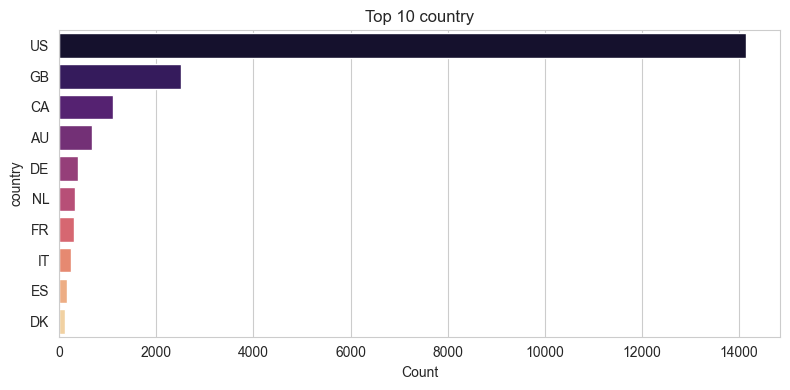

C:\Users\anand\AppData\Local\Temp\ipykernel_28996\2603766540.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top.values, y=top.index, palette='magma')


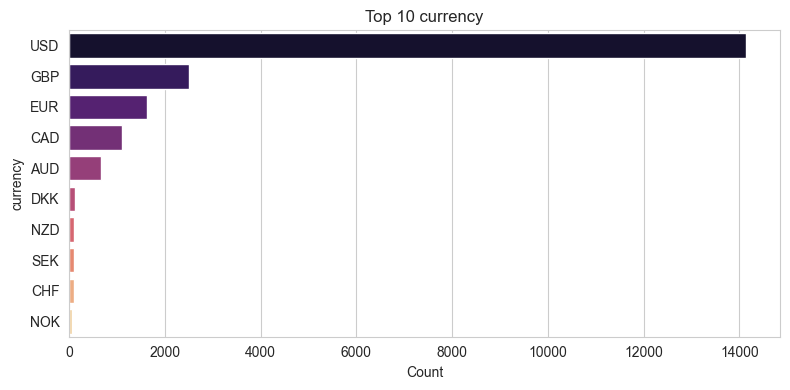

In [134]:
cat_cols = ['country', 'currency']
for col in cat_cols:
    top = df[col].value_counts().nlargest(10)
    plt.figure(figsize=(8,4))
    sns.barplot(x=top.values, y=top.index, palette='magma')
    plt.title(f"Top 10 {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


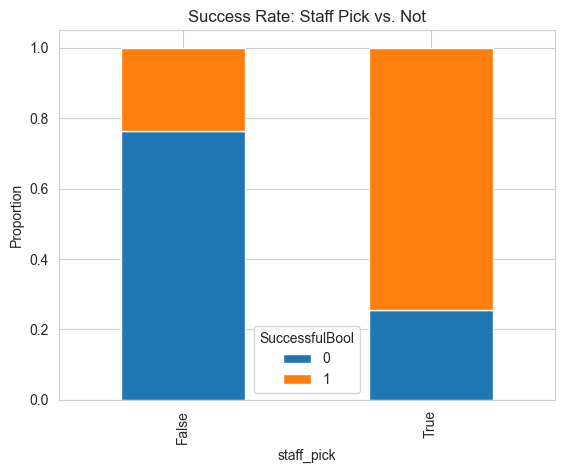

In [135]:
pd.crosstab(df_reduced['staff_pick'], df_reduced['SuccessfulBool'], normalize='index').plot.bar(stacked=True)
plt.title("Success Rate: Staff Pick vs. Not")
plt.ylabel("Proportion")
plt.show()

Non–staff-picked campaigns succeed less than one in four times (≈23%).  Staff-picked campaigns reverse that trend, succeeding roughly three out of four times (≈75%).  Projects that get Kickstarter’s stamp of approval have a much higher chance of success—either because the platform selects stronger campaigns or because the badge itself boosts visibility and pledges.  


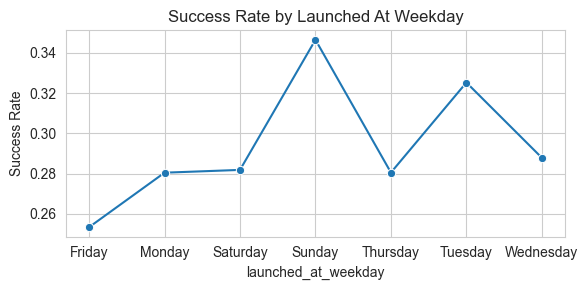

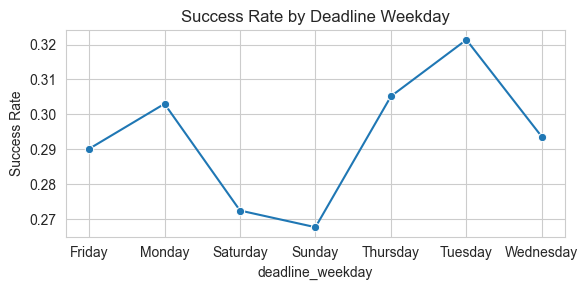

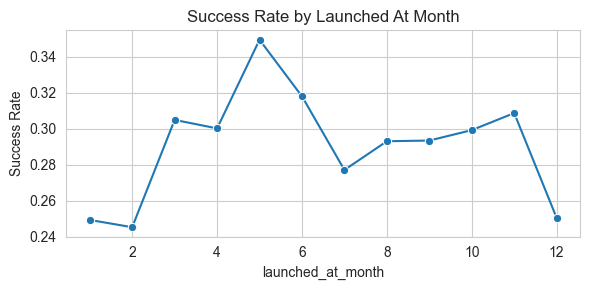

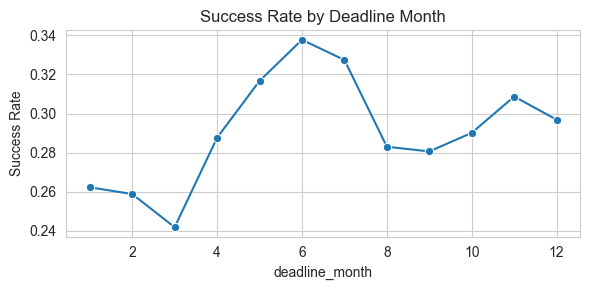

In [136]:
for when in ['launched_at_weekday', 'deadline_weekday', 'launched_at_month', 'deadline_month']:
    agg = df.groupby(when)['SuccessfulBool'].mean()
    plt.figure(figsize=(6,3))
    sns.lineplot(x=agg.index, y=agg.values, marker='o')
    plt.title(f"Success Rate by {when.replace('_',' ').title()}")
    plt.ylabel("Success Rate")
    plt.tight_layout()
    plt.show()


Weekend vs. weekday: Launching on a Sunda and ending on a Tuesday appears to give a modest edge.  

Seasonality: Campaigns in late spring/early summer (May–July) consistently outperform those launched or ending in mid‐winter/early spring.  

TF-IDF on blurb, name

In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    stop_words='english'
)

tfidf_matrix = vectorizer.fit_transform(df['blurb'])

# Reduce dimensionality to 50 components
svd = TruncatedSVD(n_components=50, random_state=42)
blurb_svd = svd.fit_transform(tfidf_matrix)

svd_cols = [f"blurb_svd_{i+1}" for i in range(blurb_svd.shape[1])]
blurb_svd_df = pd.DataFrame(blurb_svd, columns=svd_cols, index=df.index)

df = pd.concat([df, blurb_svd_df], axis=1)

In [138]:
tfidf_matrix = vectorizer.fit_transform(df['name'])

# Reduce dimensionality to 50 components
svd = TruncatedSVD(n_components=50, random_state=42)
name_svd = svd.fit_transform(tfidf_matrix)

svd_cols = [f"name_svd_{i+1}" for i in range(name_svd.shape[1])]
name_svd_df = pd.DataFrame(name_svd, columns=svd_cols, index=df.index)

df = pd.concat([df, name_svd_df], axis=1)